In [122]:
from sklearn import linear_model
import numpy as np
import pandas as pd
x_train=pd.read_csv('../X_train.csv', sep=',')
y_train=pd.read_csv('../y_train.csv', sep=',')
x_test=pd.read_csv('../X_test.csv', sep=',')


In [129]:
# Scale data MinMax

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = MinMaxScaler()
scaler_x = scaler_x.fit(x_train)  # Don't cheat - fit only on training data
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)  # apply same transformation to test data

scaler_y = MinMaxScaler()
scaler_y = scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)

columns = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
x_train = pd.DataFrame(x_train, columns=columns)
x_test = pd.DataFrame(x_test, columns=columns)
columns = ["Id", "PRP"]
y_train = pd.DataFrame(y_train, columns=columns)

print(x_train.mean(axis = 0))
print(x_test.mean(axis = 0))
print(y_train.mean(axis = 0))
print(x_train.std(axis = 0))
print(x_test.std(axis = 0))
print(y_train.std(axis = 0))

MYCT     0.127228
MMIN     0.088548
MMAX     0.180137
CACH     0.095192
CHMIN    0.082418
CHMAX    0.093885
dtype: float64
MYCT     0.120849
MMIN     0.084737
MMAX     0.197273
CACH     0.111852
CHMIN    0.122889
CHMAX    0.144401
dtype: float64
Id     0.500000
PRP    0.084034
dtype: float64
MYCT     0.181251
MMIN     0.123906
MMAX     0.179556
CACH     0.151841
CHMIN    0.116951
CHMAX    0.121372
dtype: float64
MYCT     0.151550
MMIN     0.112230
MMAX     0.200200
CACH     0.185713
CHMIN    0.175774
CHMAX    0.223278
dtype: float64
Id     0.291267
PRP    0.132929
dtype: float64


In [ ]:
# Scale data standard

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
scaler_x = scaler_x.fit(x_train)  # Don't cheat - fit only on training data
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)  # apply same transformation to test data

scaler_y = StandardScaler()
scaler_y = scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)

columns = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
x_train = pd.DataFrame(x_train, columns=columns)
x_test = pd.DataFrame(x_test, columns=columns)
columns = ["Id", "PRP"]
y_train = pd.DataFrame(y_train, columns=columns)

print(x_train.mean(axis = 0))
print(x_test.mean(axis = 0))
print(y_train.mean(axis = 0))
print(x_train.std(axis = 0))
print(x_test.std(axis = 0))
print(y_train.std(axis = 0))

In [78]:
# Initial empty prediction dataframe
index = np.arange(len(x_test.iloc[:,0]))
columns = ["Id"]
rows = len(x_test.iloc[:,0])
data = np.arange(rows, dtype=int)
prediction = pd.DataFrame(data, columns=columns)

In [80]:
# Get real PRP values
real_values=pd.read_csv('../machine.csv', sep=',')
raw_test=pd.read_csv('../X_test.csv', sep=',')
columns = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
index = np.arange(len(raw_test))
final = pd.DataFrame(index=index, columns=columns)

for i in range(len(x_test)):
    row = raw_test.loc[i]
    MYCT = row["MYCT"] == real_values["MYCT"]
    MMIN = row["MMIN"] == real_values["MMIN"]
    MMAX = row["MMAX"] == real_values["MMAX"]
    CACH = row["CACH"] == real_values["CACH"]
    CHMIN = row["CHMIN"] == real_values["CHMIN"]
    CHMAX = row["CHMAX"] == real_values["CHMAX"]
    
    new_final_row = real_values[MYCT&MMIN&MMAX&CACH&CHMIN&CHMAX]
    if len(final) > 1:
        new_final_row = new_final_row.iloc[0]
    final.iloc[i] = new_final_row
print(final["PRP"])

0       38
1      208
2       12
3      307
4       45
5       45
6       52
7       20
8       53
9       25
10      30
11      38
12     248
13      71
14     214
15      36
16      32
17      36
18      31
19     134
20      41
21       8
22     105
23      24
24     106
25     133
26      45
27     367
28       6
29     198
30      51
31      20
32     109
33     237
34      30
35    1150
36      18
37     367
38      21
39      42
40      51
Name: PRP, dtype: int64


In [156]:
# Calculate MSE

from sklearn.metrics import mean_squared_error
from math import sqrt

slice = 12
mse = mean_squared_error(final.iloc[:]["PRP"], prediction.iloc[:]["PRP"])
rms = sqrt(mse)

print(rms)

41 41
78.06032688982503


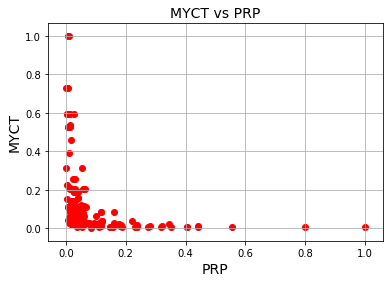

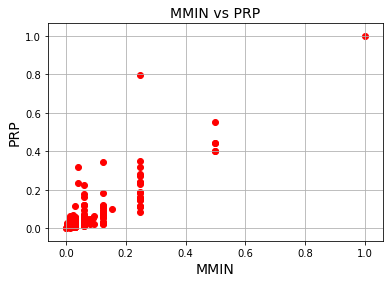

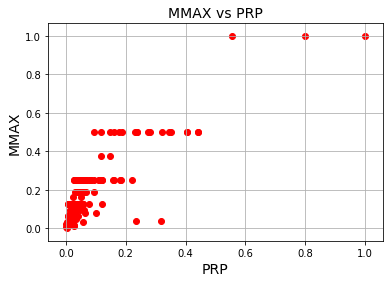

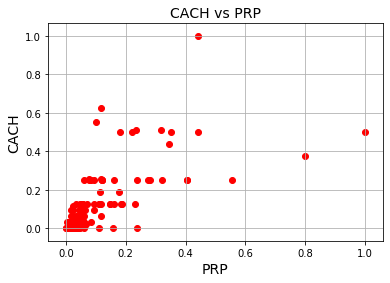

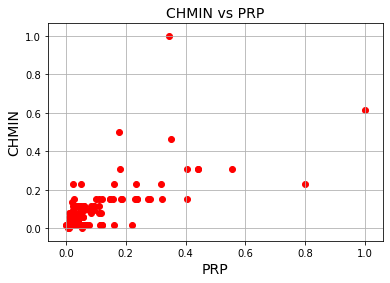

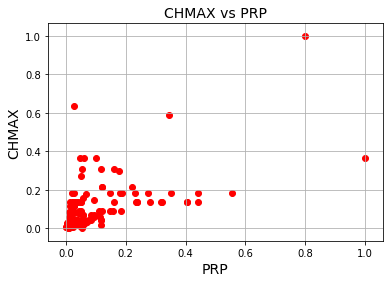

In [81]:
# Checking for linearity

import matplotlib.pyplot as plt

plt.scatter(y_train['PRP'], x_train["MYCT"], color='red')
plt.title('MYCT vs PRP', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('MYCT', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(x_train["MMIN"], y_train['PRP'], color='red')
plt.title('MMIN vs PRP', fontsize=14)
plt.xlabel('MMIN', fontsize=14)
plt.ylabel('PRP', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(y_train['PRP'], x_train["MMAX"], color='red')
plt.title('MMAX vs PRP', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('MMAX', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(y_train['PRP'], x_train["CACH"], color='red')
plt.title('CACH vs PRP', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CACH', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(y_train['PRP'], x_train["CHMIN"], color='red')
plt.title('CHMIN vs PRP', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CHMIN', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(y_train['PRP'], x_train["CHMAX"], color='red')
plt.title('CHMAX vs PRP', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CHMAX', fontsize=14)
plt.grid(True)
plt.show()

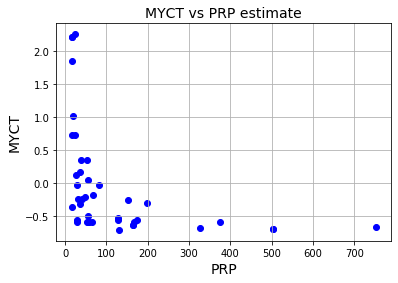

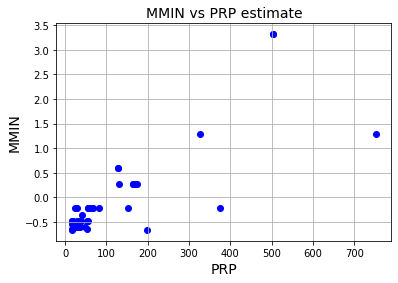

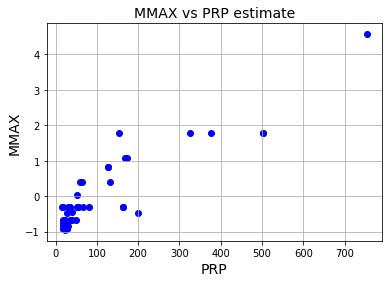

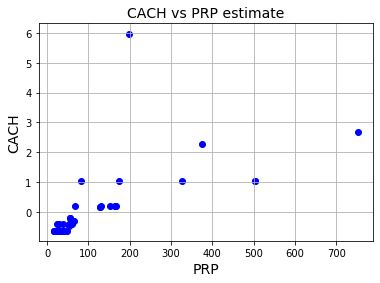

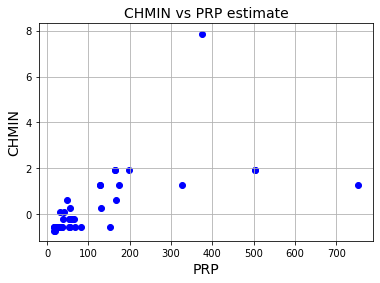

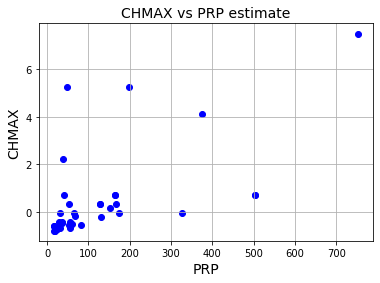

In [49]:
# Estimated PRP

plt.scatter(prediction['PRP'], x_test["MYCT"], color='blue')
plt.title('MYCT vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('MYCT', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(prediction['PRP'], x_test["MMIN"], color='blue')
plt.title('MMIN vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('MMIN', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(prediction['PRP'], x_test["MMAX"], color='blue')
plt.title('MMAX vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('MMAX', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(prediction['PRP'], x_test["CACH"], color='blue')
plt.title('CACH vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CACH', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(prediction['PRP'], x_test["CHMIN"], color='blue')
plt.title('CHMIN vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CHMIN', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(prediction['PRP'], x_test["CHMAX"], color='blue')
plt.title('CHMAX vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CHMAX', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Linear least squares
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train["PRP"])

#data = np.zeros(rows) + reg.intercept_
#for i in range(len(reg.coef_)):
#    data += reg.coef_[i]*x_test.iloc[:,i]
#prediction["PRP"] = np.around(data).astype(int)
prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("lls_results.csv", index=False)


In [ ]:
# Linear least squares w/o MYCT
reg = linear_model.LinearRegression()
reg.fit(x_train.iloc[:,1:], y_train["PRP"])

#data = np.zeros(rows) + reg.intercept_
#for i in range(len(reg.coef_)):
#    data += reg.coef_[i]*x_test.iloc[:,i]
#prediction["PRP"] = np.around(data).astype(int)
prediction["PRP"] = np.around(reg.predict(x_test.iloc[:,1:])).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("lls_wo_results.csv", index=False)


In [50]:
# Ridge Regression
reg = linear_model.RidgeCV()
reg.fit(x_train, y_train["PRP"])
print(reg.score(x_train, y_train["PRP"]))

prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("rr_results.csv", index=False)


0.8834492777506975
 Id  PRP
  0    0
  1    1
  2    0
  3    2
  4    0
  5   -1
  6    0
  7   -1
  8    0
  9   -1
 10    0
 11   -1
 12    1
 13    0
 14    1
 15   -1
 16   -1
 17   -1
 18   -1
 19    0
 20    0
 21   -1
 22    0
 23   -1
 24    1
 25    0
 26    0
 27    2
 28   -1
 29    2
 30    0
 31   -1
 32    0
 33    1
 34    0
 35    4
 36   -1
 37    2
 38    0
 39   -1
 40    0


In [35]:
# Kernel Ridge Regression
from sklearn.kernel_ridge import KernelRidge

reg = KernelRidge(alpha=1.0, kernel="rbf", gamma=10000)
reg.fit(x_train, y_train["PRP"])

prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("krr_results.csv", index=False)

 Id  PRP
  0    0
  1    0
  2   12
  3    0
  4    0
  5    0
  6   30
  7    0
  8    0
  9    0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    0
 21    0
 22    0
 23    0
 24    0
 25    0
 26    0
 27    0
 28    0
 29    0
 30    0
 31    0
 32    0
 33    0
 34    0
 35    0
 36    0
 37    0
 38    0
 39    0
 40    0


In [ ]:
# Polynomial Ridge Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_ = poly.fit_transform(x_train)
predict_ = poly.fit_transform(x_test)

clf = linear_model.RidgeCV()
clf.fit(X_, y_train["PRP"])
print(clf.predict(predict_))


prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("rr_results.csv", index=False)


In [80]:
# Ridge Regression w/o first col
reg = linear_model.RidgeCV()
reg.fit(x_train.iloc[:,1:], y_train["PRP"])
print(reg.score(x_train.iloc[:,1:], y_train["PRP"]))

index = np.arange(len(x_test.iloc[:,0]))
columns = ["Id"]
rows = len(x_test.iloc[:,0])
data = np.arange(rows, dtype=int)
rr = pd.DataFrame(data, columns=columns)

rr["PRP"] = reg.predict(x_test.iloc[:,1:])
prp = np.around(scaler_y.inverse_transform(rr)[:,1]).astype(int)
prediction["PRP"] = prp
print(prediction.to_string(index=False))
prediction.to_csv("rr_scaled_wo_results.csv", index=False)


0.879325171290678
 Id  PRP
  0   88
  1  203
  2   10
  3  437
  4   48
  5   -1
  6   79
  7   -4
  8   55
  9    2
 10  163
 11    0
 12  299
 13   29
 14  188
 15   19
 16   17
 17   32
 18   22
 19  168
 20   78
 21   -5
 22   63
 23    8
 24  203
 25  139
 26   94
 27  448
 28   -9
 29  349
 30  155
 31  -12
 32   68
 33  208
 34   65
 35  654
 36  -13
 37  448
 38   34
 39   26
 40  155


In [103]:
# Ridge Regression
reg = linear_model.RidgeCV(alphas=np.arange(1,2,50000), fit_intercept=True)
reg.fit(x_train, y_train["PRP"])
print(reg.score(x_train, y_train["PRP"]))

index = np.arange(len(x_test.iloc[:,0]))
columns = ["Id"]
rows = len(x_test.iloc[:,0])
data = np.arange(rows, dtype=int)
rr = pd.DataFrame(data, columns=columns)

rr["PRP"] = reg.predict(x_test)
prp = np.around(scaler_y.inverse_transform(rr)[:,1]).astype(int)
prediction["PRP"] = prp
print(prediction.to_string(index=False))
prediction.to_csv("rr_scaled_results.csv", index=False)


0.8843057292359112
 Id  PRP
  0   93
  1  201
  2   29
  3  429
  4   40
  5    5
  6   71
  7  -15
  8   57
  9   -1
 10  167
 11    3
 12  300
 13   26
 14  185
 15   15
 16   22
 17   22
 18   15
 19  168
 20   77
 21  -14
 22   54
 23   23
 24  200
 25  132
 26   87
 27  460
 28  -13
 29  356
 30  148
 31    6
 32   65
 33  204
 34   61
 35  678
 36    5
 37  460
 38   25
 39   19
 40  148


In [154]:
# rfr
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, max_depth=10)
reg.fit(x_train, y_train["PRP"])

print(reg.score(x_train, y_train["PRP"]))

index = np.arange(len(x_test.iloc[:,0]))
columns = ["Id"]
rows = len(x_test.iloc[:,0])
data = scaled_id[:rows]

rr = pd.DataFrame(data, columns=columns)

rr["PRP"] = reg.predict(x_test)
prp = np.around(scaler_y.inverse_transform(rr)[:,1]).astype(int)
prediction["PRP"] = prp
print(prediction.to_string(index=False))
prediction.to_csv("rfr_scaled_results.csv", index=False)

0.9786730023360425
 Id  PRP
  0   37
  1  122
  2   16
  3  375
  4   55
  5   18
  6   56
  7   26
  8   54
  9   34
 10   51
 11   18
 12  314
 13   57
 14  164
 15   26
 16   23
 17   54
 18   31
 19  148
 20   85
 21   17
 22   53
 23   17
 24  122
 25  114
 26   62
 27  498
 28   26
 29  193
 30  167
 31   17
 32   69
 33  175
 34   39
 35  756
 36   19
 37  498
 38   28
 39   33
 40  167


In [ ]:
# Bayesian ridge regression
reg = linear_model.BayesianRidge(compute_score=True)
reg.fit(x_train, y_train["PRP"])
print(reg.score(x_train, y_train["PRP"]))

prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("brr_results.csv", index=False)

In [49]:
reg = linear_model.LassoCV(cv=5)
reg.fit(x_train, y_train["PRP"])

a = np.around(reg.predict(x_test)).astype(int)
prediction["PRP"] = a.clip(min=6)
print(prediction.to_string(index=False))
prediction.to_csv("lasso_results.csv", index=False)


 Id  PRP
  0   19
  1  204
  2   34
  3  224
  4   63
  5   19
  6  117
  7    6
  8   63
  9   11
 10   11
 11   13
 12  324
 13   46
 14  204
 15   46
 16   36
 17   46
 18    6
 19  224
 20   63
 21    6
 22   63
 23   36
 24  204
 25  150
 26  117
 27  456
 28    6
 29   20
 30   96
 31    6
 32   63
 33  204
 34   43
 35  539
 36    6
 37  456
 38   49
 39   46
 40   96


In [ ]:
reg = linear_model.ElasticNet()
reg.fit(x_train, y_train["PRP"])

prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("mtl_results.csv", index=False)


In [ ]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin.fit(x_train, y_train["PRP"])
print(svr_lin.predict(x_test))

#prediction.to_csv("linearSVR_results.csv", index=False)